# Lausanne Traffic Network Analysis

Download and analyze the road network of Lausanne for traffic simulation.

In [4]:
import osmnx as ox
import networkx as nx
from shapely import wkt
import matplotlib.pyplot as plt

In [5]:
hull_polygon = 'POLYGON ((6.6973149 46.4991489, 6.5474464 46.508319, 6.5441708 46.5091808, 6.5429015 46.5134131, 6.5361596 46.5588201, 6.5949948 46.5926757, 6.6582251 46.5991119, 6.7121747 46.571259, 6.7180473 46.5236707, 6.7159339 46.5179337, 6.7123702 46.5099251, 6.7077559 46.5021425, 6.7016307 46.4999401, 6.6973149 46.4991489))'
hull = wkt.loads(hull_polygon)

In [7]:
networks = {}
for net_type in ['drive', 'walk', 'bike']:
    networks[net_type] = ox.graph_from_polygon(hull, network_type=net_type)

# Default to drive network for visualization
G = networks['drive']

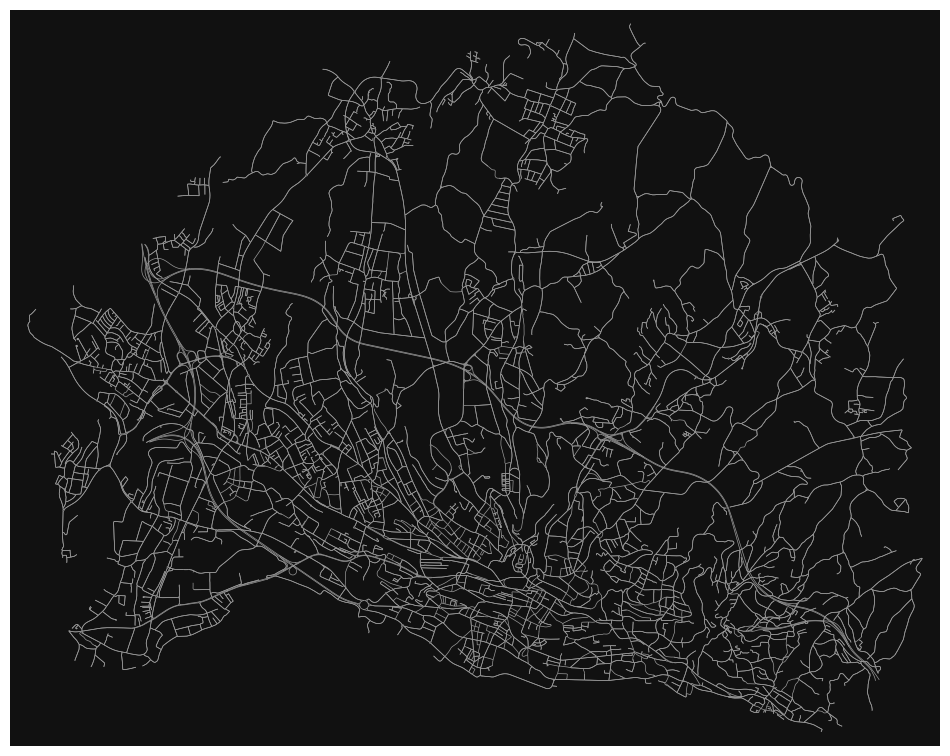

In [13]:
# Visualize network
fig, ax = ox.plot_graph(G, figsize=(12, 12), node_size=0, edge_linewidth=0.5)

In [9]:
# Inspect graph properties
sample_edge = list(G.edges(data=True))[0]
print("Sample edge attributes:", sample_edge[2].keys())

Sample edge attributes: dict_keys(['osmid', 'highway', 'lanes', 'maxspeed', 'oneway', 'reversed', 'length', 'geometry'])


In [10]:
# Compare network sizes
for name, graph in networks.items():
    length_km = sum(d['length'] for _, _, d in graph.edges(data=True)) / 1000
    print(f"{name:8} - Nodes: {len(graph.nodes):>5,} | Edges: {len(graph.edges):>6,} | Length: {length_km:>6.1f} km")

drive    - Nodes: 4,771 | Edges: 10,854 | Length: 1547.1 km
walk     - Nodes: 44,048 | Edges: 109,106 | Length: 4638.5 km
bike     - Nodes: 27,615 | Edges: 60,931 | Length: 3507.6 km


In [ ]:
# Save networks to disk
for name, graph in networks.items():
    ox.save_graphml(graph, f"data/graph/lausanne_{name}.graphml")
print("Saved:", ", ".join(f"lausanne_{name}.graphml" for name in networks.keys()))

Saved: lausanne_drive.graphml, lausanne_walk.graphml, lausanne_bike.graphml


In [ ]:
# Export networks for QGIS (GeoPackage format)
for name, graph in networks.items():
    nodes, edges = ox.graph_to_gdfs(graph)
    nodes.to_file(f"data/graph/lausanne_{name}_nodes.gpkg", layer="nodes", driver="GPKG")
    edges.to_file(f"data/graph/lausanne_{name}_edges.gpkg", layer="edges", driver="GPKG")
print("Exported GeoPackages for QGIS.")

Exported GeoPackages for QGIS.
